# Assignment 3

Due Wed, Mar  23, 23:59pm, commited to your `phys248` repo on the Abacus GitLab server. 

## 1.
The _SIR_ model (W. O. Kermack and A. G. McKendrick, 1927, see [Wikipedia page on this topic for references and additional detail](https://en.wikipedia.org/wiki/Mathematical_modelling_of_infectious_disease)) describes the outbreak and evolution of an infectious desease.

The model describes the evolution of a population with $N$ individuals, each of which belongs at any given time to one of three _compartments_:
* $S(t)$ is used to represent the number of individuals not yet infected with the disease at time t, and which are susceptible to the disease.
* $I(t)$ is the number of individuals that are infected and contagious.
* $R(t)$ represents individuals who have been infected and then removed from the disease, either due to immunization or due to death. Individuals in this category are not able to be infected again or to transmit the infection to others.

The total population $ N = S(t) + I(t) +R(t) $ is constant. In this model there is a general progression of individuals: 
$$\mathcal{S} \rightarrow \mathcal{I}  \rightarrow \mathcal{R}$$

The differential equations are interestingly quite similar to reaction networks in chemistry or nuclear physics, where a member of compartment $\mathcal{S}$ has to interact with a member of compartment $\mathcal{I}$ to create a new member of $\mathcal{I}$. This is equivalent to a reaction. The transition from $\mathcal{I}$ to $\mathcal{R}$ is equivalent to a radioactive decay.

The system of differential equations is:
$$ \frac{dS}{dt} = -\frac{\beta S I}{N} $$
$$ \frac{dI}{dt} = \frac{\beta S I}{N} - \gamma I$$
$$ \frac{dR}{dt} = \gamma I$$


$\gamma$ represents the mean recovery/death rate in units of $\mathrm{d^{-1}}$, and $1/\gamma$ is the mean infective period $P_\mathrm{inf} = 1/\gamma$. The infective period is the asymptomatic incubation period plus the symptomatic time until the individual transitions to compartment $\mathcal{R}$. 

$\beta$ represents the infection rate. If $n_\mathrm{inf}$ is the number of members of $\mathcal{S}$ each member of $\mathcal{I}$ infects, then $\beta = n_\mathrm{inf} / P_\mathrm{inf} = n_\mathrm{inf} \gamma$. 

The final input parameters are the population size $N$ and the initial values $S_0$, $I_0$ and $R_0$. 

### 1.1 
Solve the model equations for $\gamma = 1/10\mathrm{d^{-1}}$ which implies an infective period of $P_\mathrm{inf} = 1/\gamma = 10\mathrm{d}$. Use as initial values $(S_0, I_0, R_0) = (N-I_0, 574,0)$ and $N=1.1\times10^7$. These are the parameters that describe approximately the situation of the Corona virus infection in China, focussing on the city of Wuhan, on January 22 2020:

![Cvirus](../Figs/Cvirus.png)

This data could at the time be viewed and exlored at the WHO web page.

By Feb 4 (13 days later) the number of infected individuals had increased to $24.4\times10^3$ individuals.

The goal is to estimate $n_\mathrm{inf}$. Start with $n_\mathrm{inf} = 2$ implying that each infected person will infect on average 2 uninfected individuals. Make a simulation for the duration of $13\mathrm{d}$ and repeat while adjusting the $n_\mathrm{inf}$ parameter (to within one decimal) until it approximately matches  the Wuhan data, i.e. after 13 days the $\mathcal{I}$ compartment has risen from its initial value to approximately $25\mathrm{k}$. What is the best value of  $n_\mathrm{inf}$?

Save the plot for this part to the file `Fig1.1.png`.

Note: The parameter $n_\mathrm{inf}$ is now widely known as the reproductive number $R_0$, not to be confused with the variable $R$ we are using here for the removed population.

In [ ]:
%pylab ipympl

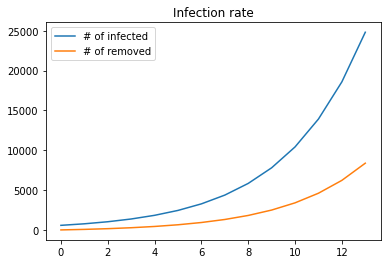

The best Ninf = 3.9000000000000004


In [8]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

N = 1.1*(10**7)
state0 = (N-574, 574, 0)

inf = np.linspace(2, 5, 31)
totalInf = np.linspace(0, 0, 31)
t_span = (0, 13)
t = np.linspace(0, 13, 14)

def func(t, state):
    S, I, R = state
    return np.array([(-1*Beta*S*I)/N, (Beta*S*I)/N-(I/10), I/10])

for i in range(len(inf)):
    Beta = inf[i]/10
    rhs = func
    sol = solve_ivp(rhs, t_span, state0, t_eval=t)
    totalInf[i] = sol.y[1][-1]

ind = np.where(abs(totalInf-24.4*10**3)<10**3)[0][0]
Beta = inf[ind]/10
sol = solve_ivp(rhs, t_span, state0, t_eval=t)

plt.title('Infection rate')
plt.plot(t, sol.y[1], label='# of infected')
plt.plot(t, sol.y[2], label='# of removed')
plt.legend()
plt.show()
    
print(f'The best Ninf = {inf[ind]}')

### 1.2 
Using these parameters make a simulation for $100d$, and plot the three compartments $S$, $I$ and $R$. We are also interested in the rate of hospital admissions per day. These are 5% of the rate of those who transition from $I$ to $R$, i.e. 5% of $\frac{dR}{dt}$. Add as well a line for the 1% fraction of those in $R$ who die. Finally, add a horizontal line for the capacity of hospital beds available in terms of admission capacity per day. China has on average [4.34 beds per 1000 people](https://en.wikipedia.org/wiki/List_of_OECD_countries_by_hospital_beds). Assume that each patient stays 4 days in hospital, and that 20% of the available hospital beds can be used for Corona virus patients. 

#### 1.2.1
After how many days from the beginning of the simulations on Jan 22nd does the hospital admission per day according to the simulation with the $n_\mathrm{inf}$ parameter from **1.1** exceed the available capacity? How many people would have died at this point? (Find these numbers approximately by interacting with your graph zooming in.) Further, in this scenario, by how much would the daily admission exceed capacity when it peaks, and what is the asymptotic number of people who would have died?

#### 1.2.2
Obviously this is not the scenario that unfolded, because $n_\mathrm{inf}$ was dramatically reduced through physical distancing. Esimate how large $n_\mathrm{inf}$ may at most be so that the hospital capacity is not overwhelmed. 

You can see that this scenario is also not what unfolded, at least not in most cases. We now understand why this is also not what happened, and why in most places $n_\mathrm{inf}$ was further reduced and kept lower. 

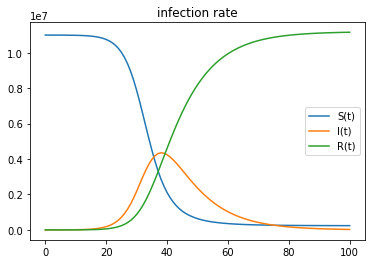

after 10 days: the number of infectant exceeds the capacity
after 10 days: 29.769184708947712 people have died
during the peak the exceed rate is: 45491.979766147684 %
Asympotic number of ppl who died: 107301.29576753263


In [62]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

N = 1.1*(10**7)
state0 = (N-574, 574, 0)
t = np.linspace(0, 100, 101)
t_span=(0, 100)
Beta = 3.9/10

Removed = [0]
died = [0]
numBeds = 4.34*(N/1000)*0.2

def func(t, state):
    S, I, R = state
    return np.array([(-1*Beta*S*I)/N, (Beta*S*I)/N-(I/10), I/10])

sol = solve_ivp(func, t_span, state0, t_eval=t)
slope = np.gradient(sol.y[2])

for i in range(1, 101):
    val = sol.y[2][i-1]
    died.append(died[i-1]+slope[i-1]*0.01)
    Removed.append(Removed[i-1]+slope[i-1]*1.04)

plt.title('infection rate')
plt.plot(t, sol.y[0], label='S(t)')
plt.plot(t, sol.y[1], label='I(t)')    
plt.plot(t, Removed, label='R(t)')
plt.legend()
plt.show()

# 1.2.1
# find when the num of infectant exceeds capacity
ind = np.where(sol.y[1] > numBeds)[0][0]
print(f"after {ind} days: the number of infectant exceeds the capacity")
print(f"after {ind} days: {died[ind]} people have died")
peek = np.where(sol.y[1] == max(sol.y[1]))[0][0]
print(f"during the peak the exceed rate is: {100*(sol.y[1][peek]-numBeds)/(numBeds)} %")
print(f"Asympotic number of ppl who died: {died[-1]}")

# 1.2.2


## Problem 2

$$
f(x) = \sin(x^{0.9})
$$ and
$$
g(x) = \cos(2x+\sqrt{x})
$$

1. Plot $g(x)$ vs. $f(x)$ for $x \in [0, \dots ,50]$ using 1000 equal intervals.
2. Make a _snake_ scatter plot of the first 40 points (40 is then the _snake length_) of the $x$ array from part 2.1. Make the size and color proportional to $x$ within the plotted range (snake length) so that the _head_ of the snake is on color and large and the tail is small and the other color.   
3. Create a multi-processing script and add it to the assignment commit, that creates 960 frames, each of which shows a snake scatter as in 2.2, but each with a different, subsequent starting point in the $x$ array from its $1^\mathrm{st}$ to $960^\mathrm{th}$ value. The multi-processing script should use 6 threads. Each frame is written to a png image file with the number of the x value in the name. Finally, use the `ffmpeg` program to combine the frames into a movie called `trig_snake.mp4`. Use `-framerate 30` to generate a swift movie experience.

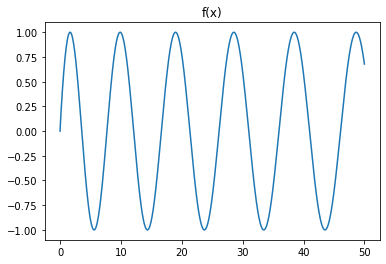

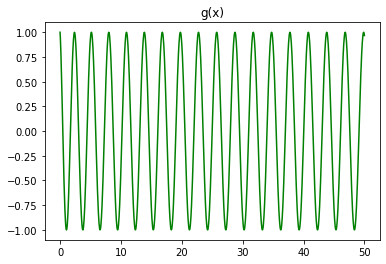

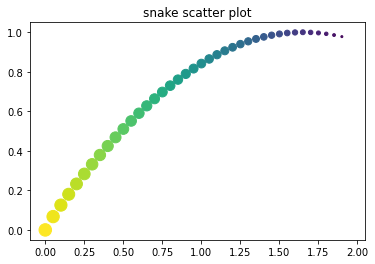

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool

# part 1
x = np.linspace(0, 50, 1001)
f = lambda x: np.sin(x**0.9)
g = lambda x: np.cos(2*x+np.sqrt(x))

plt.title('f(x)')
plt.plot(x, f(x))
plt.show()

plt.title('g(x)')
plt.plot(x, g(x), c='green')
plt.show()

# part 2
size = [4*i for i in range(39, -1, -1)]
color = np.linspace(39, 0, 40)
plt.title('snake scatter plot')
plt.scatter(x[0:40], f(x)[0:40], s=size, c=color, cmap='viridis')
plt.show()

## Problem 3
A network of species x1, x2 and x3 is defined by the following transmutations:

```
x1 + x2 -> 2 x3 
x3 + x1 -> 2 x2
x3 + x2 -> 2 x1
```

For example, one particle of type x1 reacts with one particle of type x2 to make 2 particles of type x3. The transmutations are preserving the total number of species. The rate at which each of these transmutations take place is `r12` for transmutation `x1 + x2 -> 2 x3` and so on. Then, the following coupled system of ODEs describe the time evolution of each species. Note that negative trems on the RHS correspond to destruction terms and positive terms are oroduction terms. 

$$
\begin{eqnarray*}
\frac{dx_1}{dt}  = -r_{12} x_1 x_2 - r_{31} x_3 x_1 + 2r_{32} x_3 x_2\\
\frac{dx_2}{dt}  = -r_{12} x_1 x_2 + 2r_{31} x_3 x_1 - r_{32} x_3 x_2 \\
\frac{dx_3}{dt}  = +2r_{12} x_1 x_2 - r_{31} x_3 x_1 - r_{32} x_3 x_2
\end{eqnarray*}
$$

### 3.1
Integrate this system for the following parameters:
```Python
# parameters, initial conditions, integration range
r12 = 0.15; r31 = 0.05; r32 = 0.25
state0 = [0.4, 1.5, 0.01]
tmin,tmax = (0,25)
```
Make a line plot of the time evolution of each of the three species as well as their sum (to check total number conservation).

### 3.2 
Find the equilibrium solutions, which are obtained by setting the LHS of the above given ODE to zero. You will have to find a SciPy library that can find the roots of multivariable functions. In most cases for any root finding algorithm to work it is key to have a good initial guess for the solution. Take your initial guess for x1, x2 and x3 from the ODE solution from 3.1 for t=10. 

Add markers for the equilibrium solution to the plot made in 3.1, at t=25.

Note: It is instructive to use this problem to explore different methods offered by the root finding package, the dependence of the found solution on the initial guess and on tolerance.

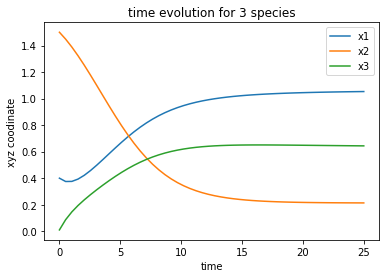

[ 0.0225 -0.0315  0.009 ]
[-3.54133421e-08 -7.08266842e-09 -2.12480052e-08]


In [23]:
import numpy as np
from scipy import integrate
from scipy.optimize import root, fsolve
import matplotlib.pyplot as plt

# 3.1 make line plot
def lorentz(t, xx, param):
    r12, r31, r32 = param
    x1, x2, x3 = xx
    rhs = np.array([-r12*x1*x2-r31*x3*x1+2*r32*x3*x2, -r12*x1*x2+2*r31*x3*x1-r32*x3*x2, 2*r12*x1*x2-r31*x3*x1-r32*x3*x2])
    return rhs

r12 = 0.15; r31 = 0.05; r32 = 0.25
param = (r12, r31, r32)
state0 = [0.4, 1.5, 0.01]
tmin,tmax = (0,25)
xx = (0.9, 0.3, 0.6) # guess the xyz values

t = np.linspace(tmin, tmax)
func = lambda t, xx: lorentz(t, xx, param)
res = integrate.solve_ivp(func, [tmin, tmax], state0, t_eval=t, rtol=10**-7)

plt.title('time evolution for 3 species')
plt.xlabel('time')
plt.ylabel('xyz coodinate')
# x coord
plt.plot(res.t, res.y[0], label='x1')
# y coord
plt.plot(res.t, res.y[1], label='x2')
# z coord
plt.plot(res.t, res.y[2], label='x3')
plt.legend()
plt.show()

def lorentz(xx):
    r12, r31, r32 = param
    x1, x2, x3 = xx
    rhs = np.array([-r12*x1*x2-r31*x3*x1+2*r32*x3*x2, -r12*x1*x2+2*r31*x3*x1-r32*x3*x2, 2*r12*x1*x2-r31*x3*x1-r32*x3*x2])
    return rhs

# 3.2 find equilibrium solution
sol = root(lorentz, x0=[0.9, 0.3, 0.6])
print(lorentz(xx))
print(sol.x)


## Problem 4

1. Create a python function `func1` that calculates 
$$f(x) = sin(x^3)\frac{x^3}{exp(-x)}$$ Make a plot for  $x\in[-2.5,1]$ using an x array representing 100 intervals.
2. Calculate the derivative $\frac{df}{dx}$ numerically and make a plot of the derivative.
3. Calculate the integral of $f(x)$ for $x\in[-2.5,1]$  using 
    * a library that uses a conventional discrete integration
    * a Monte-Carlo method
4. Solve the ODE $$\frac{dx}{dt} = f(x)$$ for the initial value $x_{01}=-1.465$, and a second time for $x_{02}=-1.463$ for $t\in[0,20]$. Make a plot of $x(t)$ for both initial value and explain briefly why the two trajectories is so different althoug the initial values are almost the same.

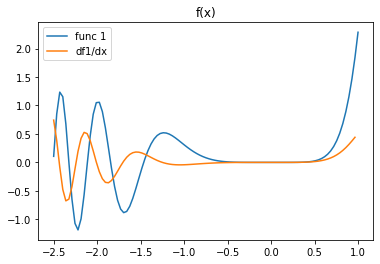

integral of f(x) using library: 0.5433885401829978
integral using monte carlo: 0.5471371591168669


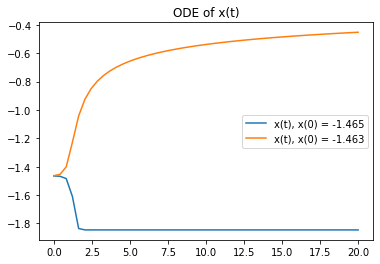

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate
import random

# part 1
x = np.linspace(-2.5, 1, 101)
f = lambda x: np.sin(x**3)*(x**3)/(np.e**(-1*x))

# part 2
dfdx = np.diff(f(x))
plt.title('f(x)')

plt.plot(x, f(x), label='func 1')
plt.plot(x[:-1], dfdx, label='df1/dx')
plt.legend()
plt.show()

# part 3 

# uses integration library
Fx = f(x).cumsum()*3.5/101 
print(f'integral of f(x) using library: {Fx[-1]}')

# monte carlo method
total = 0
cnt = 0
N = 1000

for i in range(N):
    xp = random.uniform(-2.5, 1)
    yp = random.uniform(min(f(x)), max(f(x)))
    closest = abs(xp)
    ind = 0
    # find the closest x value
    for j in range(len(x)):
        if abs(x[j]-xp) < closest:
            closest = abs(x[j]-xp)
            ind = j
    # check if the point is inside the function
    if yp <= f(x)[ind] and yp > 0:
        cnt += 1
    elif yp >= f(x)[ind] and yp < 0:
        cnt -= 1
    total += 1
print(f"integral using monte carlo: {3.5*(max(f(x))-min(f(x)))*(cnt/total)}")

# part 4
x01 = -1.465
x02 = -1.463
t = np.linspace(0, 20)
dxdt = lambda x, t: np.sin(x**3)*(x**3)/(np.e**(-1*x))

xx1 = integrate.odeint(dxdt, x01, t)
xx2 = integrate.odeint(dxdt, x02, t)

plt.title('ODE of x(t)')
plt.plot(t, xx1, label='x(t), x(0) = -1.465')
plt.plot(t, xx2, label='x(t), x(0) = -1.463')
plt.legend()
plt.show()

4.4: 
The reson why the trajectory is going differently for such a close inital value between -1.463 and -1.465 is because of unstable equilibrium solution near x(t) = -1.463 and -1.465. 
The unstable equilibrium solutions show that the slope fields are diverging while the curve that matches the solution will always follow the slope fields.